#            Covid 19 Data Analysis 🦠

# <font color='#f92672'>────────────────────────────────</font> ────────────────────────────────

<img src= "https://my.clevelandclinic.org/-/scassets/images/org/health/articles/21214-coronavirus-covid-19" style="width:800px; height:554px;"></img>

### Installation and Setup 💻

In [1]:
import os
os.getcwd()

'/content'

In [ ]:
api_token={"username":"adityaajithkumar","key":"xxxxx2"}

import json
with open('kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [ ]:
!pip install kaggle

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [ ]:
api.dataset_download_files("imdevskp/corona-virus-report")

In [ ]:
import zipfile
with zipfile.ZipFile("corona-virus-report.zip","r") as zip_ref:
    zip_ref.extractall("")

# <font color='#e6cd4d'>────────────────────────────────</font>
# <font color='#26c9fc'>────────────────────────────────</font>


### Libraries 📚

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotx

In [ ]:
plt.style.use(matplotx.styles.dracula) #Styling for Graphs

# <font color='#ffffff'>────────────────────────────────</font> ────────────────────────────────

 ### 1.Data Importing ⬇️

In [ ]:
df=pd.read_csv("covid_19_clean_complete.csv") # Complete Data
cw=pd.read_csv("country_wise_latest.csv") #Country Wise Data
dw=pd.read_csv("day_wise.csv") #Day wise Data

### 1.1 Data Description📝

In [ ]:
print("Complete Data")
df.head()

Complete Data


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
print("Day Wise Data")
dw.head()

Day Wise Data


,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [ ]:
print("Country Wise Data")
cw.head()

Country Wise Data


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


# <font color='#ae81dc'>────────────────────────────────</font>
# <font color='#ff822d'>────────────────────────────────</font>

### 1.2 Data Processing and Cleaning 🔄️

In [ ]:
print("Death Median:",dw["Deaths"].median())
print("Death Mean",dw["Deaths"].mean())
print("Recovered Median:",dw["Recovered"].median())
print("Recovered Mean",dw["Recovered"].mean())
print("Active Median:",dw["Active"].median())
print("Active Mean",dw["Active"].mean())

Death Median: 204190.0
Death Mean 230770.76063829788
Recovered Median: 784784.0
Recovered Mean 2066001.2180851065
Active Median: 1859759.0
Active Mean 2110188.0319148935


In [ ]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [ ]:
cw.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [ ]:
def clean_nan(df, replacement=""):
    return df.replace(np.nan, replacement)
cleaned_data = clean_nan(df, "Not Available")


In [ ]:
df.drop(['WHO Region'], axis=1, inplace=True)

In [ ]:
df.groupby('Country/Region')[['Confirmed','Deaths','Recovered']].sum().sort_values(by='Deaths', ascending=False)


,Confirmed,Deaths,Recovered
Country/Region,,,
US,224345948,11011411,56353416
United Kingdom,26748587,3997775,126217
Brazil,89524967,3938034,54492873
Italy,26745145,3707717,15673910
France,21210926,3048524,7182115
...,...,...,...
Bhutan,4971,0,2838
Mongolia,16999,0,9902
Timor-Leste,2487,0,0


In [ ]:
cleaned_data.head

<bound method NDFrame.head of       Province/State         Country/Region        Lat       Long        Date  \
0      Not Available            Afghanistan  33.939110  67.709953  2020-01-22   
1      Not Available                Albania  41.153300  20.168300  2020-01-22   
2      Not Available                Algeria  28.033900   1.659600  2020-01-22   
3      Not Available                Andorra  42.506300   1.521800  2020-01-22   
4      Not Available                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063  Not Available  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064  Not Available                  Yemen  15.552727  48.516388  2020-07-27   
49065  Not Available                Comoros -11.645500  43.333300  2020-07-27   
49066  Not Available             Tajikistan  38.861000  71.276100  2020-07-27   
49067  Not Available                Lesotho -29.610000  28.233600  2020-07-27  

# <font color='#f92672'>────────────────────────────────</font> ────────────────────────────────

# Ploting 📊

# <font color='#26c9fc'>────────────────────────────────</font> ────────────────────────────────

# COVID-19 Case Trends

This set of line plots represents the trends in COVID-19 cases. Each plot shows the progression of a different aspect of the pandemic:

- **Deaths**: The number of fatalities due to the virus.
- **Recovered**: The number of individuals who have recovered from the virus.
- **Active Cases**: The number of currently active COVID-19 cases.

The data is plotted over time, allowing us to visualize and understand the progression of the pandemic.


### 1.line plot

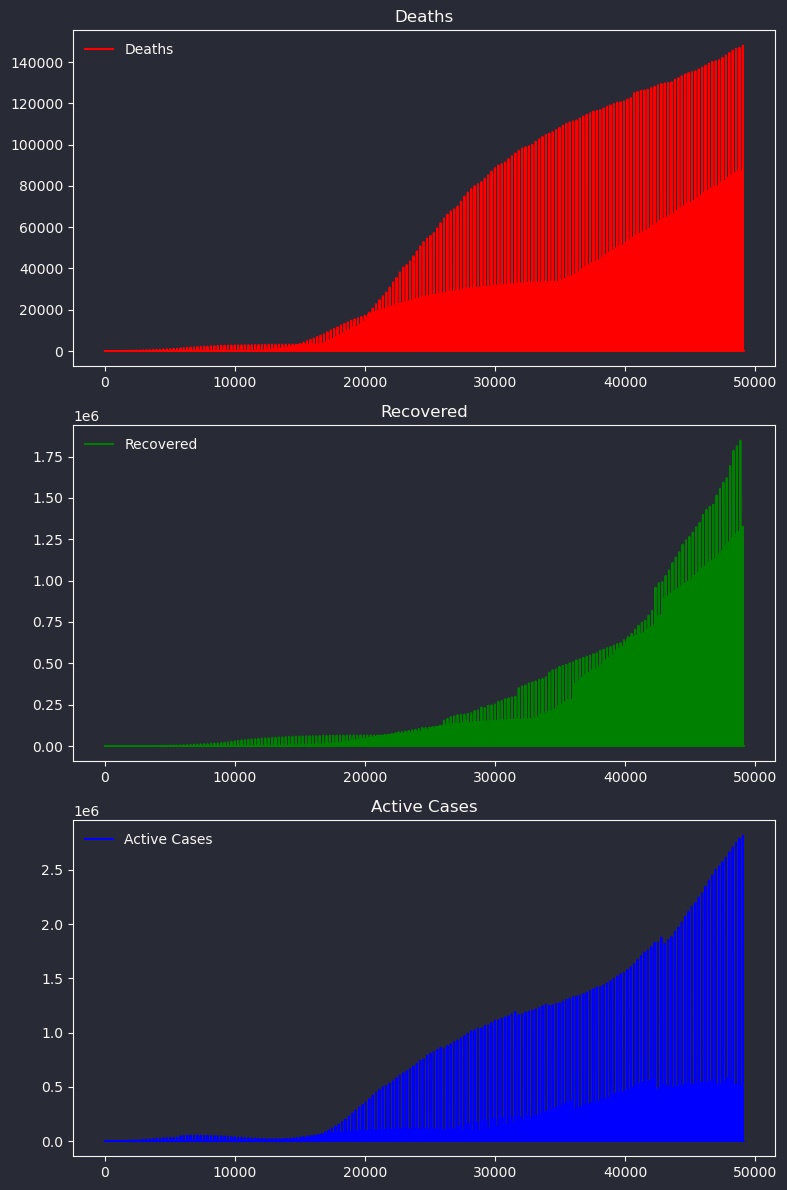

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

axes[0].plot(df.index, df["Deaths"], label='Deaths', color='red')
axes[1].plot(df.index, df["Recovered"], label='Recovered', color='green')
axes[2].plot(df.index, df["Active"], label='Active Cases', color='blue')

axes[0].legend()
axes[1].legend()
axes[2].legend()


axes[0].set_title("Deaths")
axes[1].set_title("Recovered")
axes[2].set_title("Active Cases")

plt.tight_layout()
plt.show()


### 2.Stacked Bar Chart of COVID-19 Cases for Top 10 Countries with Most Active Cases

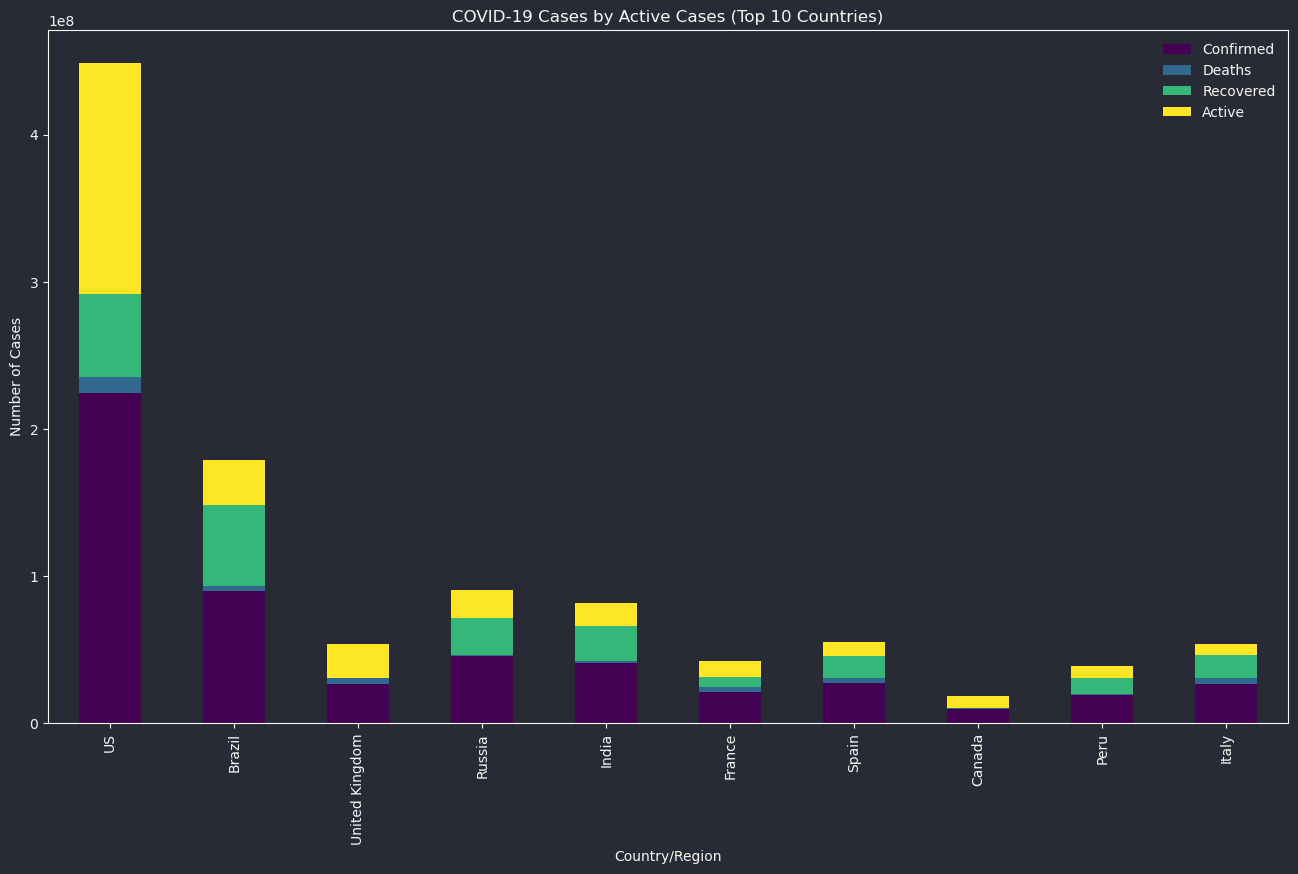

In [ ]:
plt.style.use(matplotx.styles.dracula)
grouped_df = df.groupby('Country/Region').sum()
top_10_countries = grouped_df.sort_values(by='Active', ascending=False).head(10)
top_10_countries.index.name = 'Country/Region'

top_10_countries[['Confirmed', 'Deaths', 'Recovered', 'Active']].plot(kind='bar', stacked=True, figsize=(16, 9), colormap='viridis')
plt.title('COVID-19 Cases by Active Cases (Top 10 Countries)')
plt.xlabel('Country/Region')
plt.ylabel('Number of Cases')
plt.show()


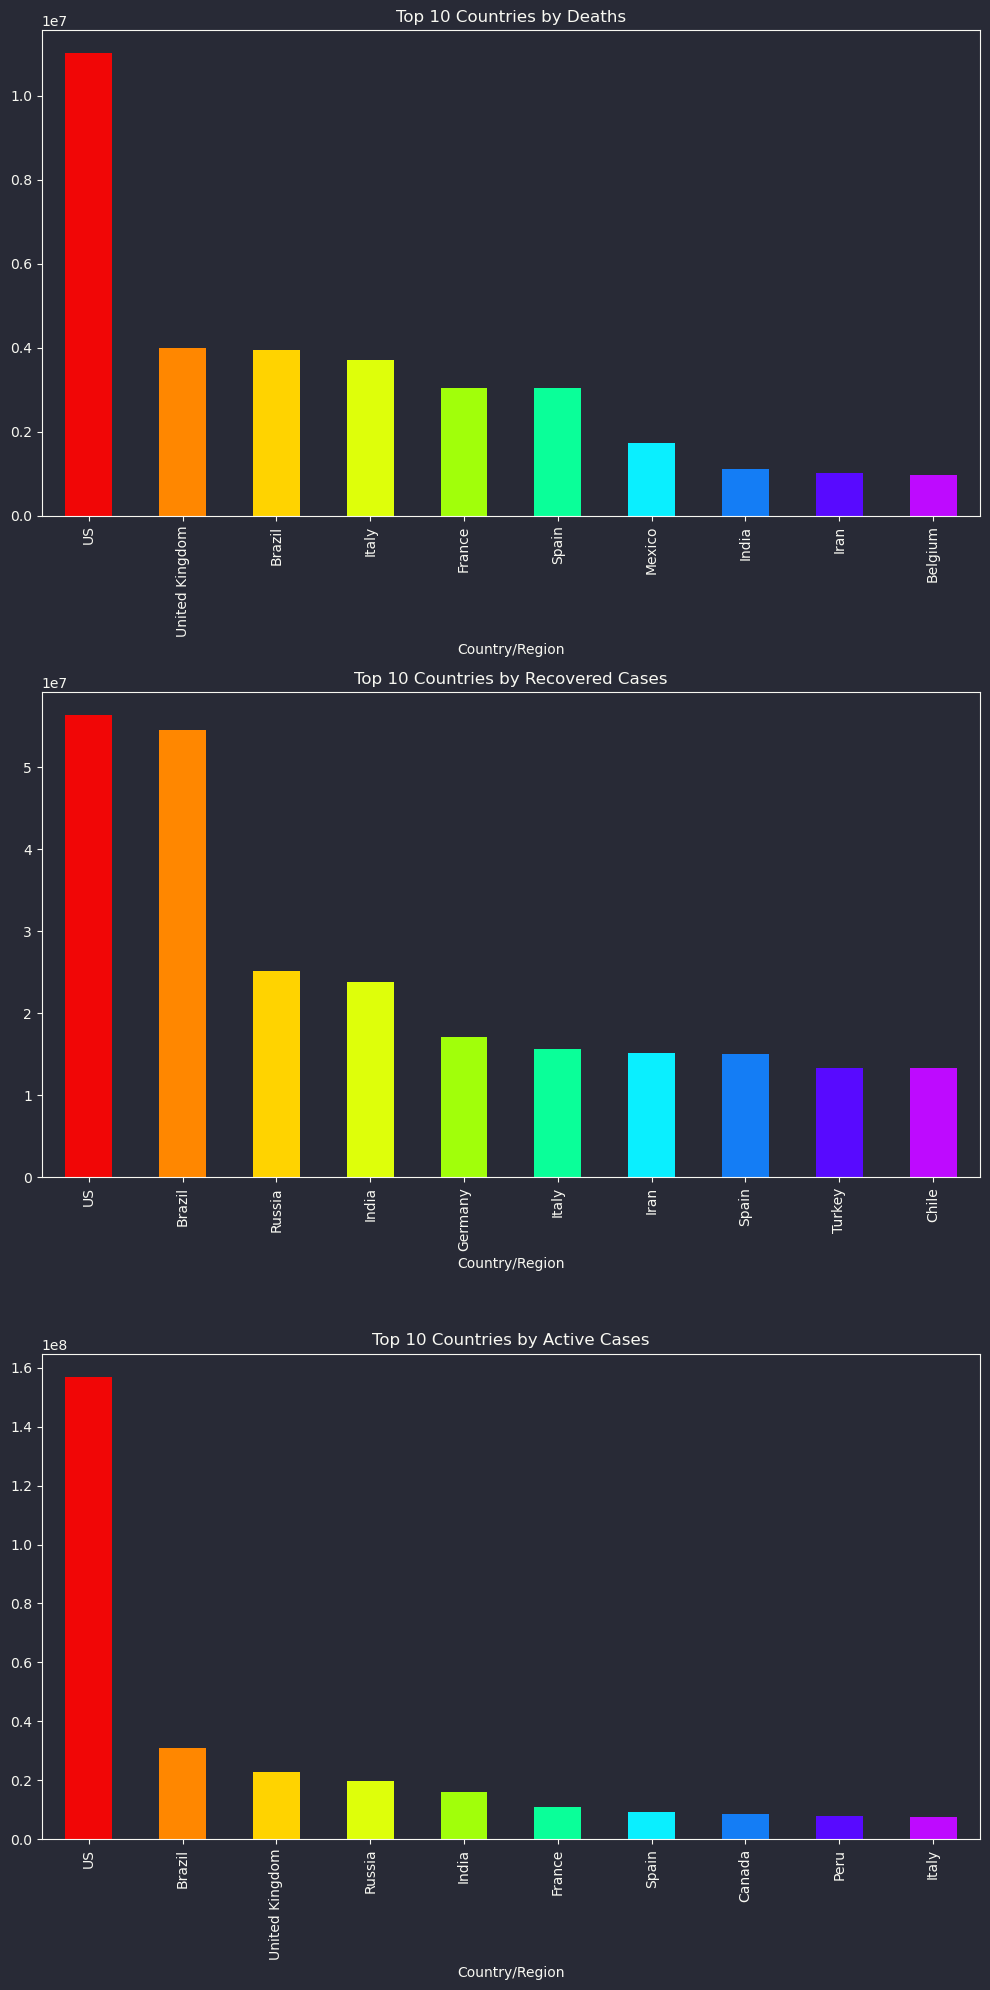

In [ ]:

plt.style.use(matplotx.styles.dracula)

grouped = df.groupby('Country/Region').sum()

top_deaths = grouped.sort_values('Deaths', ascending=False).head(10)
top_recovered = grouped.sort_values('Recovered', ascending=False).head(10)
top_active = grouped.sort_values('Active', ascending=False).head(10)
fig, axs = plt.subplots(3, 1, figsize=(10, 20))

colors = ['#f10606', '#ff8700', '#ffd300', '#deff0a', '#a1ff0a', '#0aff99', '#0aefff', '#147df5', '#580aff', '#be0aff']

top_deaths['Deaths'].plot(kind='bar', ax=axs[0], color=colors)
top_recovered['Recovered'].plot(kind='bar', ax=axs[1], color=colors)
top_active['Active'].plot(kind='bar', ax=axs[2], color=colors)

axs[0].set_title('Top 10 Countries by Deaths')
axs[1].set_title('Top 10 Countries by Recovered Cases')
axs[2].set_title('Top 10 Countries by Active Cases')

plt.tight_layout()
plt.show()


# <font color='#fde725'>────────────────────────────────</font>
# <font color='#35b779'>────────────────────────────────</font>


### 3.Interactive World Map of Latest COVID-19 Statistics by Country/Region


In [ ]:
df_lat_long = df[['Country/Region', 'Lat', 'Long']]
df_lat_long = df_lat_long.drop_duplicates()
cw = cw.merge(df_lat_long, on='Country/Region', how='left')


In [ ]:
import folium
from folium.plugins import MarkerCluster
world_map = folium.Map(location=[0, 0], zoom_start=2)

marker_cluster = MarkerCluster().add_to(world_map)

grouped_df = cw.groupby('Country/Region').last().reset_index()

def add_marker(row):
    folium.Marker(location=[row['Lat'], row['Long']],
                  popup=f"{row['Country/Region']}<br>Confirmed: {row['Confirmed']}<br>Deaths: {row['Deaths']}<br>Recovered: {row['Recovered']}",
                  icon=folium.Icon(color='blue', icon='info-sign')).add_to(marker_cluster)


grouped_df.apply(add_marker, axis=1)

world_map


C:\Users\Aditya Ajith Kumar\AppData\Local\Temp\ipykernel_16168\1500820675.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


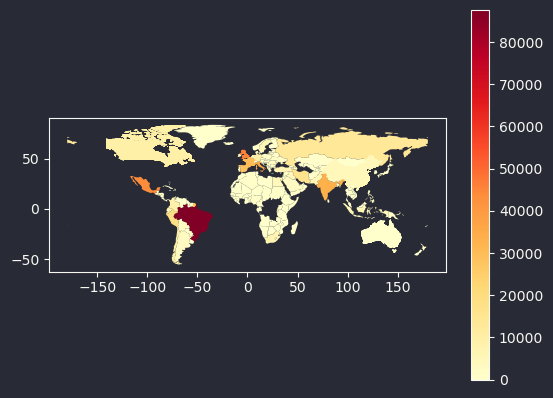

In [ ]:
import geopandas as gpd


# Load a GeoDataFrame with country boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.set_index('name').join(cw.set_index('Country/Region'))


fig, ax = plt.subplots(1, 1)
merged.plot(column='Deaths', ax=ax, legend=True, cmap='YlOrRd')

plt.show()


# <font color='#26c9fc'>────────────────────────────────</font> ────────────────────────────────

### 4.Relation Map

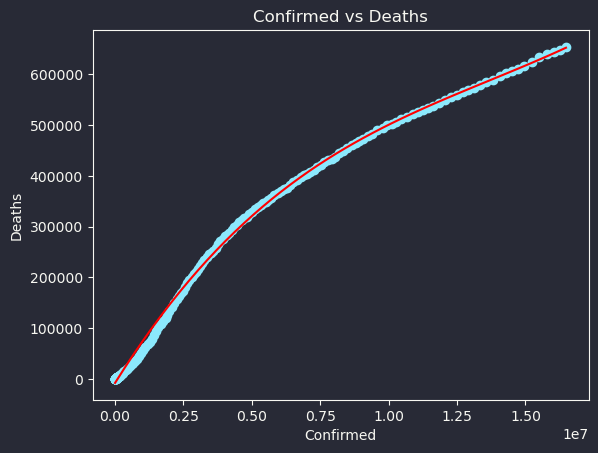

In [ ]:
confirmed = np.array(dw['Confirmed'])
deaths = np.array(dw['Deaths'])
coefficients = np.polyfit(confirmed, deaths, 3)
polynomial = np.poly1d(coefficients)
x = np.linspace(confirmed.min(), confirmed.max())
y = polynomial(x)
plt.scatter(confirmed, deaths)
plt.plot(x, y, color='red')
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.title('Confirmed vs Deaths')
plt.show()


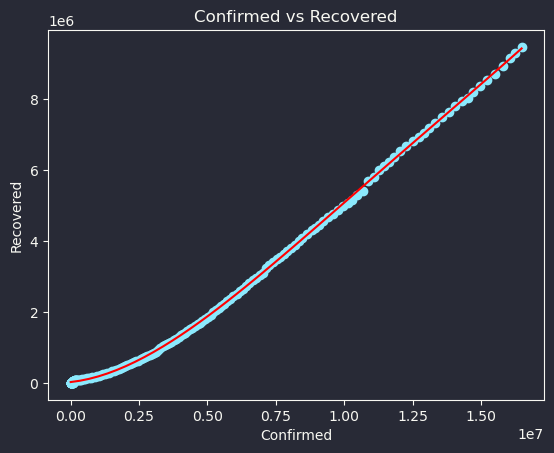

In [ ]:
import numpy as np
import plotly.express as px

import matplotlib.pyplot as plt
confirmed = np.array(dw['Confirmed'])
recovered = np.array(dw['Recovered'])
coefficients = np.polyfit(confirmed, recovered,4)
polynomial = np.poly1d(coefficients)
x = np.linspace(confirmed.min(), confirmed.max())
y = polynomial(x)
plt.scatter(confirmed, recovered)
plt.plot(x, y, color='red')
plt.xlabel('Confirmed')
plt.ylabel('Recovered')
plt.title('Confirmed vs Recovered')
plt.show()



# <font color='#26c9fc'>────────────────────────────────</font> ────────────────────────────────

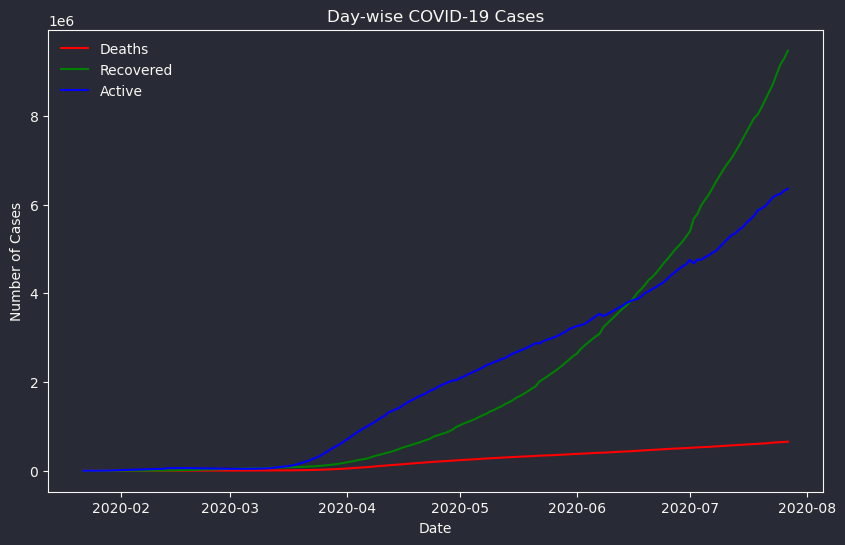

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


dw['Date'] = pd.to_datetime(dw['Date'], format='%Y-%m-%d')


plt.figure(figsize=(10,6))
plt.plot(dw['Date'], dw['Deaths'], label='Deaths', color='red')
plt.plot(dw['Date'], dw['Recovered'], label='Recovered', color='green')
plt.plot(dw['Date'], dw['Active'], label='Active', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Day-wise COVID-19 Cases')
plt.legend()
plt.show()


### 5.Pie Chart

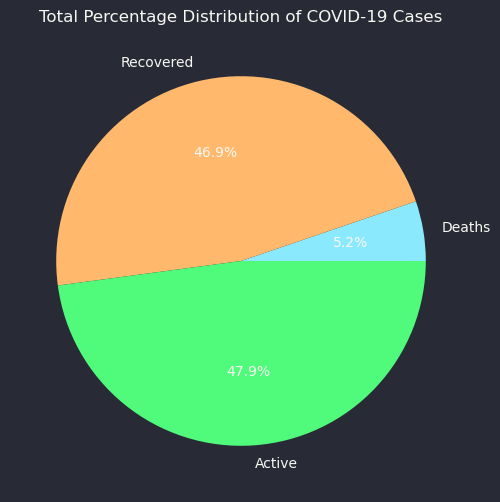

In [ ]:
import matplotlib.pyplot as plt

data = dw[['Deaths', 'Recovered', 'Active']].sum()

plt.figure(figsize=(10,6))
plt.pie(data, labels=['Deaths', 'Recovered', 'Active'], autopct='%1.1f%%')
plt.title('Total Percentage Distribution of COVID-19 Cases')
plt.show()


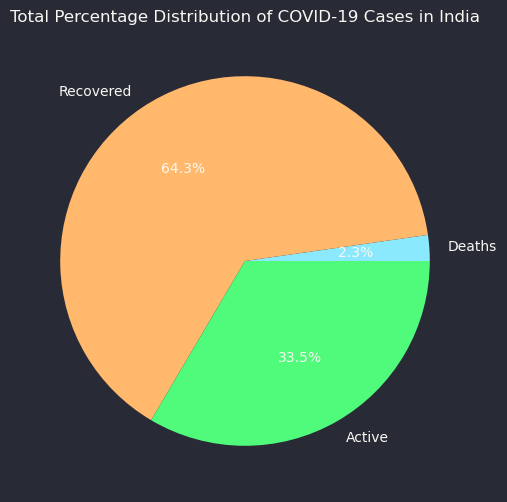

In [ ]:
import matplotlib.pyplot as plt

data_india = cw[cw['Country/Region'] == 'India'][['Deaths', 'Recovered', 'Active']].sum()
plt.figure(figsize=(10,6))
plt.pie(data_india, labels=['Deaths', 'Recovered', 'Active'], autopct='%1.1f%%')
plt.title('Total Percentage Distribution of COVID-19 Cases in India')
plt.show()


### 6.Heatmap

             Deaths  Confirmed  Recovered
Deaths     1.000000   0.975981   0.936940
Confirmed  0.975981   1.000000   0.990165
Recovered  0.936940   0.990165   1.000000


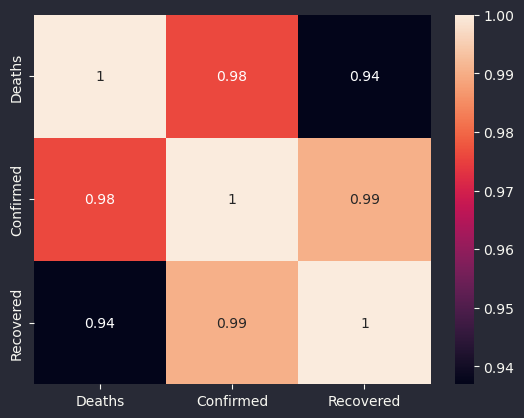

In [ ]:
cor = dw[['Deaths', 'Confirmed', 'Recovered']].corr()
print(cor)
sns.heatmap(cor, annot=True)
plt.show()

### The data analysis has provided insights into the progression of the COVID-19 pandemic, revealing trends in deaths, recoveries, and active cases, and correlations between different variables.